<a href="https://colab.research.google.com/github/Jay2251929205/Jiayi-Wang-ECON317/blob/main/HW/ECON317_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:


import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Problem2

In [19]:
def pvalue(n):
  tail = n**0.5*(110000-100000)/100000
  f = 1-norm.cdf(tail)
  return f

In [20]:
df= pd.DataFrame()
df['n']=range(1,1000)
df['p']=pvalue(df['n'])

Text(0, 0.5, 'p value')

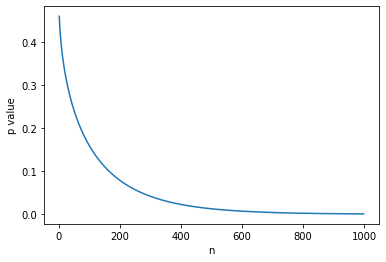

In [21]:
plot=()
plt.plot(df['n'],df['p'])
plt.xlabel('n')
plt.ylabel('p value')

#Problem3


In [22]:
def pvalue(mu,n,sigma,c):
  tail = n**0.5*(mu-c)/sigma
  f = 1-norm.cdf(tail)
  return f

In [23]:
mu=110000
sigma=100000
c=116400
n=100
pvalue(mu,n,sigma,c)

0.7389137003071384

In [25]:
#Monte Carlo

import math


In [27]:
x = 0
for i in range(1000000):

  if np.mean(np.random.normal(110000, 100000,100))<=116400:
    x+=1
print(str(x/10000)+'% of the simulation are type II errro')

73.9033% of the simulation are type II errro


#Problem4

In [31]:


def pvalue(mu,n,sigma,c):
  tail = n**0.5*(mu-c)/sigma
  f = 1-norm.cdf(tail)
  return f

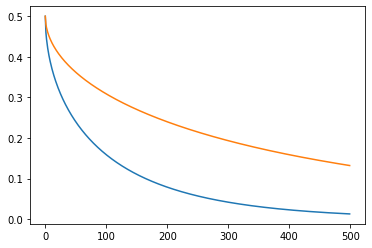

In [36]:
s=50000
c=100000
x_bar=110000
mu=115000

def e1(n):
    return pvalue(x_bar,n,sigma,c)
def e2(n):
    return pvalue(mu,n,sigma,x_bar)
E1=[]
E2=[]

n=500; r=range(0,n)
for i in r:
    E1.append(e1(i))
    E2.append(e2(i))

plt.plot(r,E1)
plt.plot(r,E2)
plt.show()

#Problem5

In [38]:
spx = pd.read_csv('https://raw.githubusercontent.com/Jay2251929205/Jiayi-Wang-ECON317/main/data/SPX30years.csv')

from statistics import variance

In [49]:
def data(period):
  x=[]
  dx=[]
  for s in spx.Close:
    x.append(math.log(s))
    try:
      dx.append(x[-1]-x[-period-1])
    except:
      pass
  dx=sorted(dx)
  return dx
dx=data(1)
mu=np.mean(dx)
s=np.std(dx)
print(mu,s)

0.00031114782365126466 0.011377126527828851


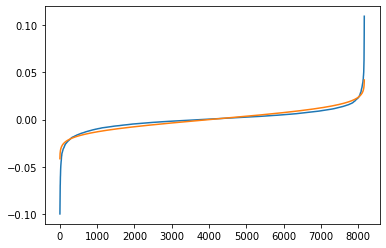

0.06753537936716411


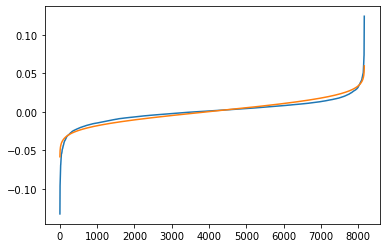

0.07420145771985376


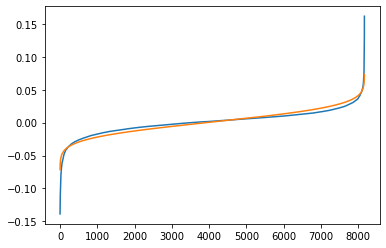

0.08849326243281087


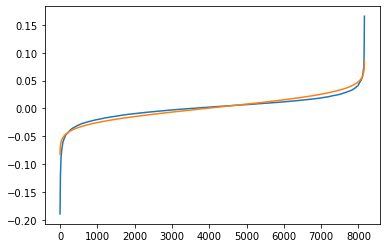

0.10668738462965537


In [53]:
mu=np.mean(data(1))
s=np.std(data(1))
for i in range(1,5):
    dx=data(i)
    r=range(1,len(dx))
    mui=mu*i
    si=s*(i**(1/2))
    
    nordx=[]
    nor=[]
    e=0
    for j in r:
        x1=dx[j]
        x2=norm.ppf(j/len(dx),mui,si)
        e=max(abs(x1-x2),e)
        
        nordx.append(x1)
        nor.append(x2)

    plt.plot(r,nordx)
    plt.plot(r,nor)
    plt.show()
    print(e)

#Problem6

In [45]:
from pandas.core.util.numba_ import jit_user_function
mu=0.2
sigma=0.4
bkpoint=0
for i in range(1000000):
  change = np.random.normal(mu,sigma,10)
  ret = 0
  for j in change:
    ret+=j
    if ret<=-0.5:
      bkpoint+=1
      break
print(str(bkpoint/10000)+'% of the simulation bankrupt')

15.038% of the simulation bankrupt


#Problem7

In [63]:
def f(x):
  return 0.124*x**2-0.072*x+0.046
upper=np.linspace(9/31,1,66)
low=np.linspace(9/31,0,27)

sigmaup=[f(i) for i in upper]
muup=[0.1*i+0.05*(1-i) for i in upper]

sigmalow=[f(i) for i in low]
mulow=[0.1*i+0.05*(1-i) for i in low]


<function matplotlib.pyplot.show(*args, **kw)>

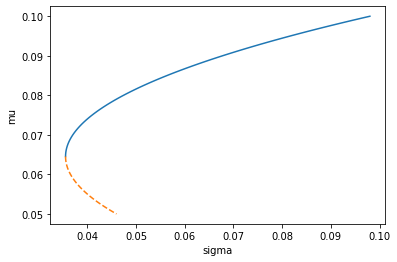

In [65]:

plt.plot(sigmaup,muup)
plt.plot(sigmalow,mulow,'--')
plt.xlabel('sigma')
plt.ylabel('mu')
plt.show